In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# preproces

In [45]:
df = pd.read_csv('final_features.csv').drop(['Unnamed: 0'],axis=1)
df


A   B        C       D        E        F        G         H         I  \
0     1   1  0.72694  1.4742  0.32396  0.98535  1.00000  0.835920  0.004657   
1     1   2  0.74173  1.5257  0.36116  0.98152  0.99825  0.798670  0.005242   
2     1   3  0.76722  1.5725  0.38998  0.97755  1.00000  0.808120  0.007457   
3     1   4  0.73797  1.4597  0.35376  0.97566  1.00000  0.816970  0.006877   
4     1   5  0.82301  1.7707  0.44462  0.97698  1.00000  0.754930  0.007428   
..   ..  ..      ...     ...      ...      ...      ...       ...       ...   
335  36   6  0.37522  1.1417  0.81725  0.68511  0.58772  0.125230  0.091860   
336  36   7  0.28064  1.0849  0.75319  0.72152  0.71404  0.136860  0.078996   
337  36   8  0.35344  1.0329  0.78147  0.70737  0.61579  0.135030  0.089763   
338  36   9  0.59988  1.1427  0.71532  0.66101  0.47544  0.157470  0.113370   
339  36  10  0.47195  1.0901  0.85409  0.53598  0.39649  0.078376  0.132270   

            J  ...       990       991       992       993       994  \
0    0.003947  ...  1.957430 -1.368883 -0.301499  1.072893  1.546317   
1    0.005002  ...  0.461172 -1.831357 -1.204886 -0.226396 -0.904920   
2    0.010121  ...  0.997498 -1.577309 -2.719056 -0.068784 -2.369685   
3    0.008607  ...  0.742218 -1.783120 -2.884050 -1.110871 -1.842747   
4    0.010042  ...  0.643030 -1.598947 -2.405208 -0.836707 -2.280971   
..        ...  ...       ...       ...       ...       ...       ...   
335  1.535800  ... -1.707822  0.964975 -3.341944 -1.109467 -2.197548   
336  1.135800  ... -1.693874  2.093219 -3.434451 -0.625785 -1.392595   
337  1.466400  ... -1.093918 -0.652697 -3.655031 -1.500917 -1.672543   
338  2.339400  ... -0.813006 -1.391962 -2.734077 -0.828948 -2.431532   
339  3.184000  ... -2.230365 -0.364323 -3.495684 -1.546778 -1.718414   

          995       996       997       998       999  
0    1.196306  0.949010  0.566271  2.183582  1.182005  
1   -0.447585 -0.260409 -1.200379  0.226618  0.908569  
2   -1.351754 -0.802335 -1.087701 -0.392465  0.102415  
3   -0.670778 -0.989545 -1.057844 -0.419344  0.556341  
4   -0.830821 -1.082651 -1.184264  0.184482  0.991342  
..        ...       ...       ...       ...       ...  
335  0.680147  0.922672 -2.462276  0.274959  2.551766  
336  1.978725  1.931579 -2.735266  1.047569  2.348830  
337  1.547865  0.351159 -2.692649  0.352426  1.974477  
338  0.266687  0.771030 -2.098815  0.431145  1.448587  
339  1.857596  0.223060 -2.158781  0.348950  2.560328  

[340 rows x 1029 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Columns: 1029 entries, A to 999
dtypes: float64(1026), int64(3)
memory usage: 2.7 MB


In [6]:
# which class has no member
cluster = df['A'].value_counts()
for i in range(1 , 37):
    try:
        cluster[i]
    except:
        print(i)

16
17
18
19
20
21


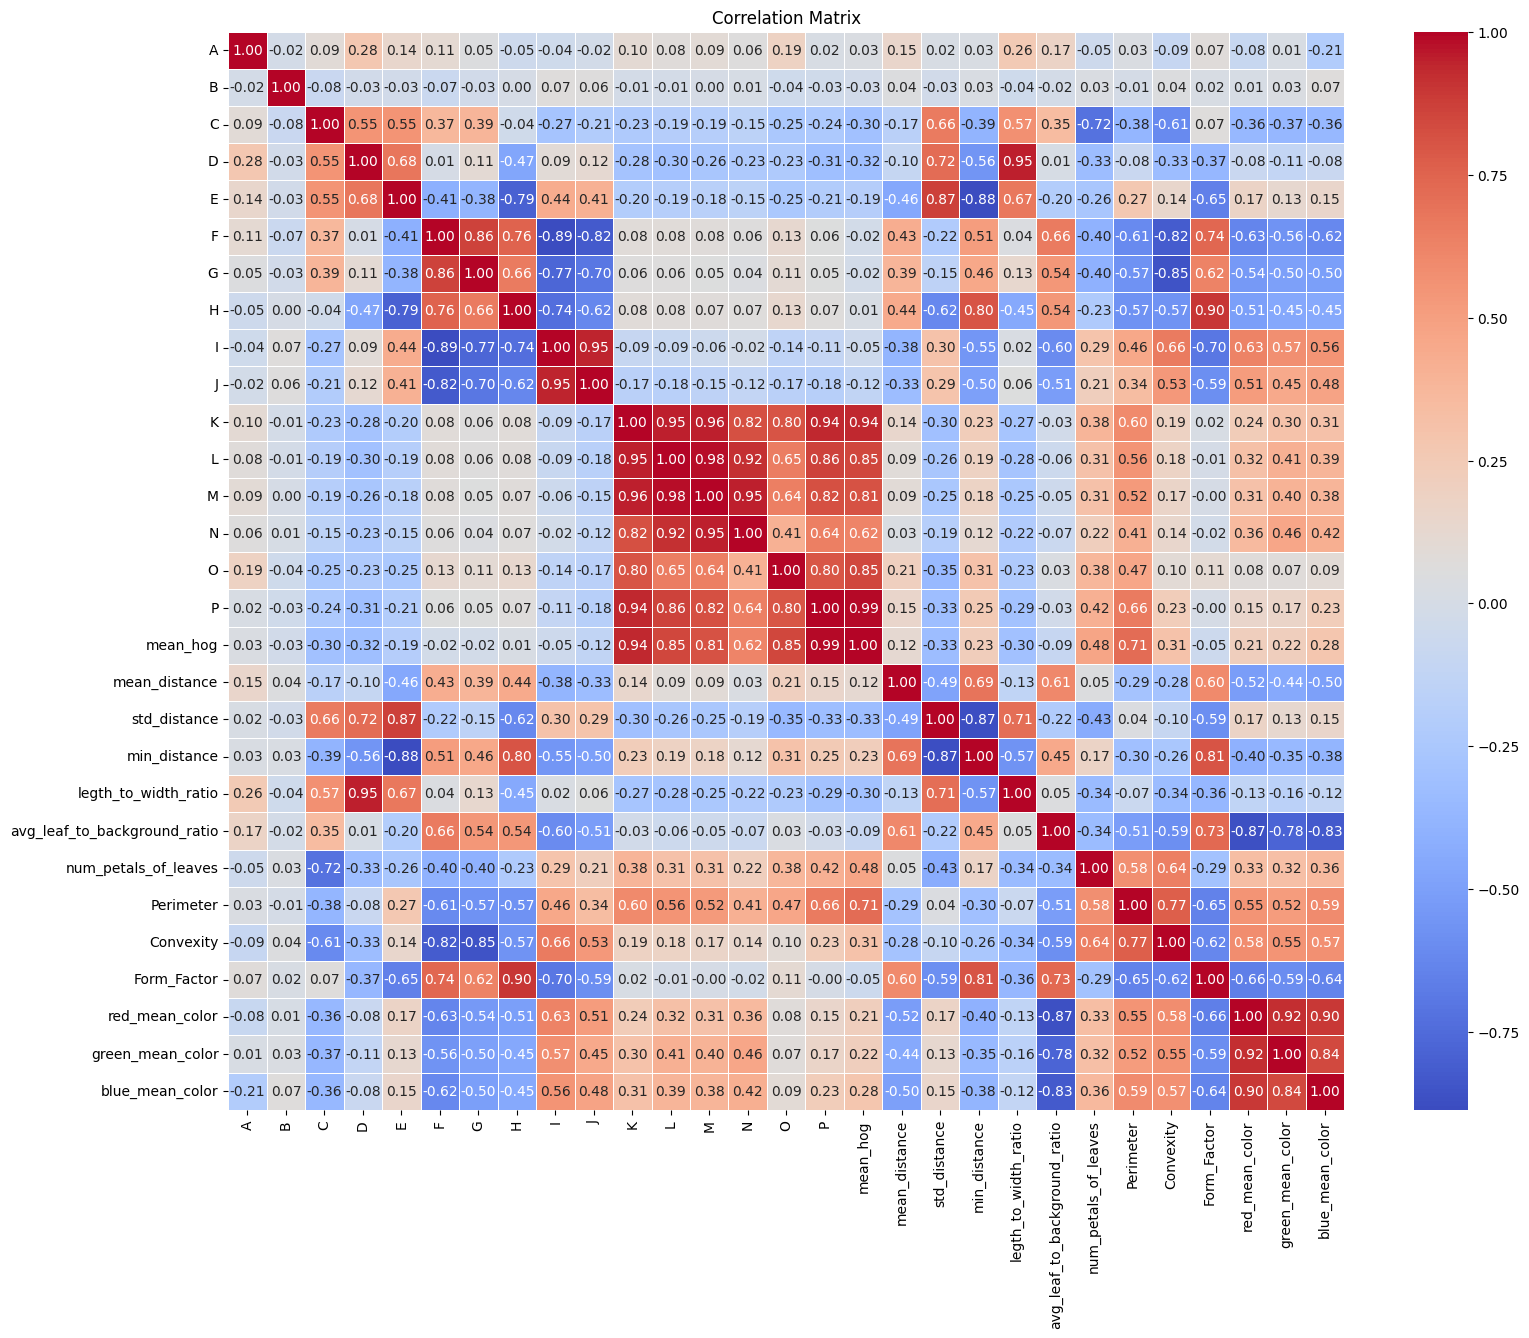

In [12]:
corr_matrix = df.iloc[: , :29].corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
df.iloc[: , 10:]

K         L         M         N         O        P  mean_hog  \
0    0.047790  0.127950  0.016108  0.005232  0.000275  1.17560  0.051392   
1    0.024160  0.090476  0.008119  0.002708  0.000075  0.69659  0.028814   
2    0.011897  0.057445  0.003289  0.000921  0.000038  0.44348  0.019050   
3    0.015950  0.065491  0.004271  0.001154  0.000066  0.58785  0.024764   
4    0.007938  0.045339  0.002051  0.000560  0.000024  0.34214  0.014760   
..        ...       ...       ...       ...       ...      ...       ...   
335  0.114880  0.208610  0.041703  0.013344  0.000820  2.02810  0.105943   
336  0.141220  0.218300  0.045488  0.012002  0.001515  2.40590  0.129710   
337  0.097663  0.207030  0.041101  0.016123  0.000453  1.69350  0.088705   
338  0.050389  0.135850  0.018121  0.006190  0.000265  1.15260  0.058292   
339  0.082007  0.187820  0.034074  0.013487  0.000329  1.56230  0.088970   

     mean_distance  std_distance  min_distance  ...       990       991  \
0         0.703678      0.111736      0.542103  ...  1.957430 -1.368883   
1         0.704189      0.107399      0.543525  ...  0.461172 -1.831357   
2         0.636708      0.138305      0.465885  ...  0.997498 -1.577309   
3         0.646394      0.119500      0.469862  ...  0.742218 -1.783120   
4         0.627335      0.154731      0.407736  ...  0.643030 -1.598947   
..             ...           ...           ...  ...       ...       ...   
335       0.666967      0.147156      0.292140  ... -1.707822  0.964975   
336       0.685826      0.135519      0.296964  ... -1.693874  2.093219   
337       0.430635      0.128816      0.190799  ... -1.093918 -0.652697   
338       0.591605      0.204739      0.159810  ... -0.813006 -1.391962   
339       0.612490      0.188508      0.181119  ... -2.230365 -0.364323   

          992       993       994       995       996       997       998  \
0   -0.301499  1.072893  1.546317  1.196306  0.949010  0.566271  2.183582   
1   -1.204886 -0.226396 -0.904920 -0.447585 -0.260409 -1.200379  0.226618   
2   -2.719056 -0.068784 -2.369685 -1.351754 -0.802335 -1.087701 -0.392465   
3   -2.884050 -1.110871 -1.842747 -0.670778 -0.989545 -1.057844 -0.419344   
4   -2.405208 -0.836707 -2.280971 -0.830821 -1.082651 -1.184264  0.184482   
..        ...       ...       ...       ...       ...       ...       ...   
335 -3.341944 -1.109467 -2.197548  0.680147  0.922672 -2.462276  0.274959   
336 -3.434451 -0.625785 -1.392595  1.978725  1.931579 -2.735266  1.047569   
337 -3.655031 -1.500917 -1.672543  1.547865  0.351159 -2.692649  0.352426   
338 -2.734077 -0.828948 -2.431532  0.266687  0.771030 -2.098815  0.431145   
339 -3.495684 -1.546778 -1.718414  1.857596  0.223060 -2.158781  0.348950   

          999  
0    1.182005  
1    0.908569  
2    0.102415  
3    0.556341  
4    0.991342  
..        ...  
335  2.551766  
336  2.348830  
337  1.974477  
338  1.448587  
339  2.560328  

[340 rows x 1019 columns]

# classification

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

categories = df['A']


svc = SVC(probability=True)
logistic = LogisticRegression(max_iter=500)
gbr = VotingClassifier(estimators=[
    ('logistic', logistic), 
    ('svc', svc),
    ], voting='soft')

mse_per_fold = []
r2_per_fold = []
mse_list = []
r2_list = []
mse_train = []
r2_train = []
scaler = StandardScaler()

for i in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[: , 10:], categories, test_size=0.2)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    gbr.fit(X_train, y_train)
    

    y_test_pred = gbr.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    mse_per_fold.append(test_mse)

    r2_fold = r2_score(y_test, y_test_pred)
    r2_per_fold.append(r2_fold)

for i, (mse, r2) in enumerate(zip(mse_per_fold, r2_per_fold), 1):
    print(f"Fold {i} Test MSE: {mse}, R-squared: {r2}")


avg_mse = np.mean(mse_per_fold)
avg_r2 = np.mean(r2_per_fold)
print(f"\nAverage Test MSE: {avg_mse}, Average R-squared: {avg_r2}")


Fold 1 Test MSE: 14.029411764705882, R-squared: 0.8817852483034602
Fold 2 Test MSE: 24.823529411764707, R-squared: 0.7764900146431131
Fold 3 Test MSE: 0.8382352941176471, R-squared: 0.9923908541050321
Fold 4 Test MSE: 28.397058823529413, R-squared: 0.8019663408535289
Fold 5 Test MSE: 17.11764705882353, R-squared: 0.8819740185377375
Fold 6 Test MSE: 18.66176470588235, R-squared: 0.845189485543699
Fold 7 Test MSE: 8.102941176470589, R-squared: 0.9312786125132058
Fold 8 Test MSE: 49.529411764705884, R-squared: 0.6232686980609418
Fold 9 Test MSE: 22.676470588235293, R-squared: 0.815650119200827
Fold 10 Test MSE: 11.338235294117647, R-squared: 0.8972167274737641

Average Test MSE: 19.551470588235297, Average R-squared: 0.8447210119235308


# Clustering

In [2]:
df = pd.read_csv('final_features.csv').drop('Unnamed: 0' , axis=1)
df

A   B        C       D        E        F        G         H         I  \
0     1   1  0.72694  1.4742  0.32396  0.98535  1.00000  0.835920  0.004657   
1     1   2  0.74173  1.5257  0.36116  0.98152  0.99825  0.798670  0.005242   
2     1   3  0.76722  1.5725  0.38998  0.97755  1.00000  0.808120  0.007457   
3     1   4  0.73797  1.4597  0.35376  0.97566  1.00000  0.816970  0.006877   
4     1   5  0.82301  1.7707  0.44462  0.97698  1.00000  0.754930  0.007428   
..   ..  ..      ...     ...      ...      ...      ...       ...       ...   
335  36   6  0.37522  1.1417  0.81725  0.68511  0.58772  0.125230  0.091860   
336  36   7  0.28064  1.0849  0.75319  0.72152  0.71404  0.136860  0.078996   
337  36   8  0.35344  1.0329  0.78147  0.70737  0.61579  0.135030  0.089763   
338  36   9  0.59988  1.1427  0.71532  0.66101  0.47544  0.157470  0.113370   
339  36  10  0.47195  1.0901  0.85409  0.53598  0.39649  0.078376  0.132270   

            J  ...       990       991       992       993       994  \
0    0.003947  ...  1.957430 -1.368883 -0.301499  1.072893  1.546317   
1    0.005002  ...  0.461172 -1.831357 -1.204886 -0.226396 -0.904920   
2    0.010121  ...  0.997498 -1.577309 -2.719056 -0.068784 -2.369685   
3    0.008607  ...  0.742218 -1.783120 -2.884050 -1.110871 -1.842747   
4    0.010042  ...  0.643030 -1.598947 -2.405208 -0.836707 -2.280971   
..        ...  ...       ...       ...       ...       ...       ...   
335  1.535800  ... -1.707822  0.964975 -3.341944 -1.109467 -2.197548   
336  1.135800  ... -1.693874  2.093219 -3.434451 -0.625785 -1.392595   
337  1.466400  ... -1.093918 -0.652697 -3.655031 -1.500917 -1.672543   
338  2.339400  ... -0.813006 -1.391962 -2.734077 -0.828948 -2.431532   
339  3.184000  ... -2.230365 -0.364323 -3.495684 -1.546778 -1.718414   

          995       996       997       998       999  
0    1.196306  0.949010  0.566271  2.183582  1.182005  
1   -0.447585 -0.260409 -1.200379  0.226618  0.908569  
2   -1.351754 -0.802335 -1.087701 -0.392465  0.102415  
3   -0.670778 -0.989545 -1.057844 -0.419344  0.556341  
4   -0.830821 -1.082651 -1.184264  0.184482  0.991342  
..        ...       ...       ...       ...       ...  
335  0.680147  0.922672 -2.462276  0.274959  2.551766  
336  1.978725  1.931579 -2.735266  1.047569  2.348830  
337  1.547865  0.351159 -2.692649  0.352426  1.974477  
338  0.266687  0.771030 -2.098815  0.431145  1.448587  
339  1.857596  0.223060 -2.158781  0.348950  2.560328  

[340 rows x 1029 columns]

In [3]:
from clustering import *
images = Images_class()
images.get_images_inf('leaves_final/')
len(images.binary_images)


c:\Users\akgh1\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\akgh1\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


340

In [283]:
df.iloc[: , 8:] 

I         J         K         L         M         N         O  \
0    0.004657  0.003947  0.047790  0.127950  0.016108  0.005232  0.000275   
1    0.005242  0.005002  0.024160  0.090476  0.008119  0.002708  0.000075   
2    0.007457  0.010121  0.011897  0.057445  0.003289  0.000921  0.000038   
3    0.006877  0.008607  0.015950  0.065491  0.004271  0.001154  0.000066   
4    0.007428  0.010042  0.007938  0.045339  0.002051  0.000560  0.000024   
..        ...       ...       ...       ...       ...       ...       ...   
335  0.091860  1.535800  0.114880  0.208610  0.041703  0.013344  0.000820   
336  0.078996  1.135800  0.141220  0.218300  0.045488  0.012002  0.001515   
337  0.089763  1.466400  0.097663  0.207030  0.041101  0.016123  0.000453   
338  0.113370  2.339400  0.050389  0.135850  0.018121  0.006190  0.000265   
339  0.132270  3.184000  0.082007  0.187820  0.034074  0.013487  0.000329   

           P  mean_hog  mean_distance  ...       990       991       992  \
0    1.17560  0.051392       0.703678  ...  1.957430 -1.368883 -0.301499   
1    0.69659  0.028814       0.704189  ...  0.461172 -1.831357 -1.204886   
2    0.44348  0.019050       0.636708  ...  0.997498 -1.577309 -2.719056   
3    0.58785  0.024764       0.646394  ...  0.742218 -1.783120 -2.884050   
4    0.34214  0.014760       0.627335  ...  0.643030 -1.598947 -2.405208   
..       ...       ...            ...  ...       ...       ...       ...   
335  2.02810  0.105943       0.666967  ... -1.707822  0.964975 -3.341944   
336  2.40590  0.129710       0.685826  ... -1.693874  2.093219 -3.434451   
337  1.69350  0.088705       0.430635  ... -1.093918 -0.652697 -3.655031   
338  1.15260  0.058292       0.591605  ... -0.813006 -1.391962 -2.734077   
339  1.56230  0.088970       0.612490  ... -2.230365 -0.364323 -3.495684   

          993       994       995       996       997       998       999  
0    1.072893  1.546317  1.196306  0.949010  0.566271  2.183582  1.182005  
1   -0.226396 -0.904920 -0.447585 -0.260409 -1.200379  0.226618  0.908569  
2   -0.068784 -2.369685 -1.351754 -0.802335 -1.087701 -0.392465  0.102415  
3   -1.110871 -1.842747 -0.670778 -0.989545 -1.057844 -0.419344  0.556341  
4   -0.836707 -2.280971 -0.830821 -1.082651 -1.184264  0.184482  0.991342  
..        ...       ...       ...       ...       ...       ...       ...  
335 -1.109467 -2.197548  0.680147  0.922672 -2.462276  0.274959  2.551766  
336 -0.625785 -1.392595  1.978725  1.931579 -2.735266  1.047569  2.348830  
337 -1.500917 -1.672543  1.547865  0.351159 -2.692649  0.352426  1.974477  
338 -0.828948 -2.431532  0.266687  0.771030 -2.098815  0.431145  1.448587  
339 -1.546778 -1.718414  1.857596  0.223060 -2.158781  0.348950  2.560328  

[340 rows x 1021 columns]

In [4]:

categories = df['A']
features = df.iloc[: , 2:] #df.drop(['A' , 'B'] , axis=1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

C:\Users\akgh1\AppData\Local\Temp\ipykernel_9680\3945122448.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_tsne.iloc[:, 0], X_tsne.iloc[:, 1], cmap='viridis', alpha=0.5)


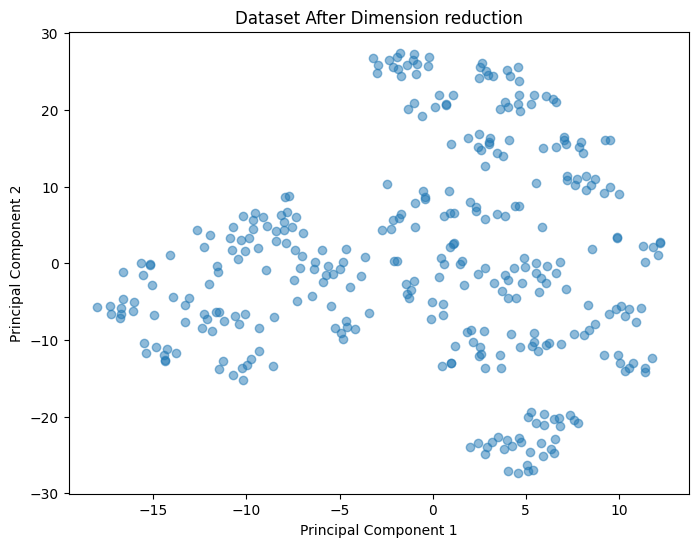

In [38]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
X_tsne = pd.DataFrame(tsne.fit_transform(features_scaled))


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne.iloc[:, 0], X_tsne.iloc[:, 1], cmap='viridis', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Dataset After Dimension reduction')
plt.show()
# X_tsne

In [89]:
import warnings
warnings.filterwarnings('ignore')

def calculate_dunn_index(data, labels):
    clusters = np.unique(labels)
    intra_cluster_distances = []
    inter_cluster_distances = []
    
    for cluster in clusters:
        cluster_points = data[labels == cluster]
        if len(cluster_points) > 1:
            intra_cluster_distance = np.max(pdist(cluster_points))
        else:
            intra_cluster_distance = 0
        intra_cluster_distances.append(intra_cluster_distance)
    
    
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            cluster_i_points = data[labels == clusters[i]]
            cluster_j_points = data[labels == clusters[j]]
            inter_cluster_distance = np.min(cdist(cluster_i_points, cluster_j_points))
            inter_cluster_distances.append(inter_cluster_distance)
    
    dunn_index = np.min(inter_cluster_distances) / np.max(intra_cluster_distances)
    return dunn_index
    
    
    # kmeans = KMeans(n_clusters=i, random_state=42)
    # clusters = kmeans.fit_predict(X_tsne)

    
    
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
class Clustering():
    def __init__(self,model='spectral') -> None:
        self.model = model
        self.inf_list = []
        self.clusters = []
        self.k = 0
    def find_best_k_cluster(self , data , k_range = (2,50) ):
        dunn_list = []
        silhouette_list = []
        
        for i in range(k_range[0] , k_range[1]):
            dic = {}

            if self.model == 'spectral':
                self.clustering_model = SpectralClustering(n_clusters=i, random_state=42 )

            elif self.model  == 'AgglomerativeClustering':
                self.clustering_model = AgglomerativeClustering(n_clusters=i)

            elif self.model  == 'kmeans':
                self.clustering_model = KMeans(n_clusters=i, random_state=42)

            
            clusters = self.clustering_model.fit_predict(data)
            
            dunn_avg = calculate_dunn_index(data, clusters)
            # print(f'dunn_avg Score: {dunn_avg} with k = {i}')
            dic['dunn_avg'] = dunn_avg

            silhouette_avg = silhouette_score(data, clusters)
            # print(f'Silhouette Score: {silhouette_avg} with i = {i}')
            dic['silhouette_avg'] = silhouette_avg

            dic['k'] = i
            dic['model'] = self.model
            dunn_list.append(dunn_avg)
            silhouette_list.append(silhouette_avg)
            self.inf_list.append(dic)
            
        print(f'finding best k cluster with model {self.model} is done')

        self.inf_list = sorted(self.inf_list, key=lambda x: (-x['silhouette_avg']))
        self.inf_df = pd.DataFrame(self.inf_list)
    
    def plot_best_K(self , n_clusters=5):
        cluster_df = pd.DataFrame(self.inf_list[ : n_clusters])
        # Set width of bar
        bar_width = 0.35

        # Set positions of bar on X axis
        r1 = np.arange(len(cluster_df['k']))
        r2 = [x + bar_width for x in r1]

        # Create bar plot
        fig, ax = plt.subplots()

        bars1 = ax.bar(r1, cluster_df['dunn_avg'], color='blue', width=bar_width, edgecolor='grey', label='Dunn Score')
        bars2 = ax.bar(r2, cluster_df['silhouette_avg'], color='green', width=bar_width, edgecolor='grey', label='Silhouette Score')

        # Add xticks on the middle of the group bars
        ax.set_xlabel('k', fontweight='bold')
        ax.set_ylabel('Scores', fontweight='bold')
        ax.set_title(f' Dunn  and Silhouette vs k ({self.model})')
        ax.set_xticks([r + bar_width / 2 for r in range(len(cluster_df['k']))])
        ax.set_xticklabels(cluster_df['k'])

        # Create legend & Show graphic
        ax.legend()

        plt.show()

    def fit_predict(self , k ,data):
        if self.model == 'spectral':
                self.clustering_model = SpectralClustering(n_clusters=k, random_state=42 )

        elif self.model  == 'AgglomerativeClustering':
            self.clustering_model = AgglomerativeClustering(n_clusters=k)

        elif self.model  == 'kmeans':
            self.clustering_model = KMeans(n_clusters=k, random_state=42)

        self.clusters = self.clustering_model.fit_predict(data)
        self.k = k
        
    def plot_data_with_clusters(self , data):

        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=self.clusters, cmap='viridis', alpha=0.5)
        plt.colorbar(scatter)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(f'{self.model} Clustering of Leaves (k=29)')
        plt.show()

In [83]:
spectral_clustering = Clustering(model='spectral')
spectral_clustering.find_best_k_cluster(X_tsne ,k_range=(2,50) )

agg_clustering = Clustering(model='AgglomerativeClustering')
agg_clustering.find_best_k_cluster(X_tsne ,k_range=(2,50) )

kmeans_clustering = Clustering(model='kmeans')
kmeans_clustering.find_best_k_cluster(X_tsne ,k_range=(2,50) )

finding best k cluster with model spectral is done
finding best k cluster with model AgglomerativeClustering is done
finding best k cluster with model kmeans is done


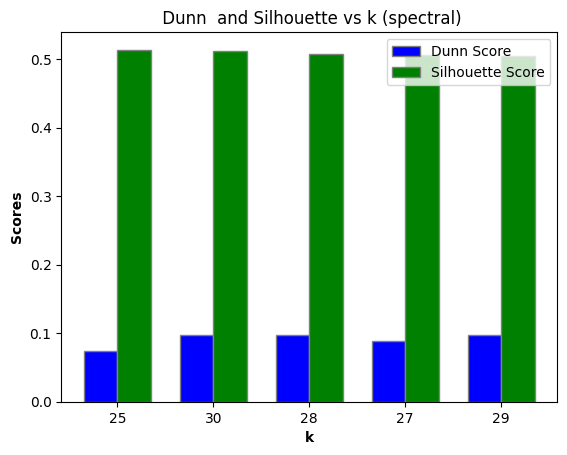

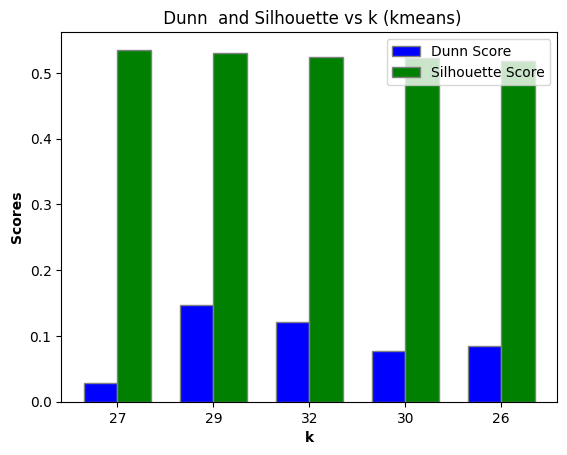

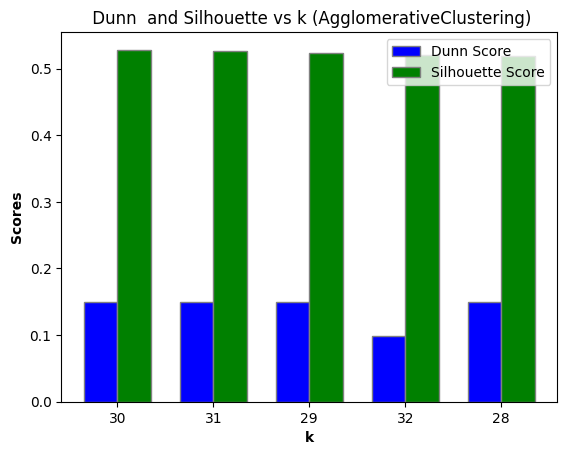

In [84]:
spectral_clustering.plot_best_K()
kmeans_clustering.plot_best_K()
agg_clustering.plot_best_K()

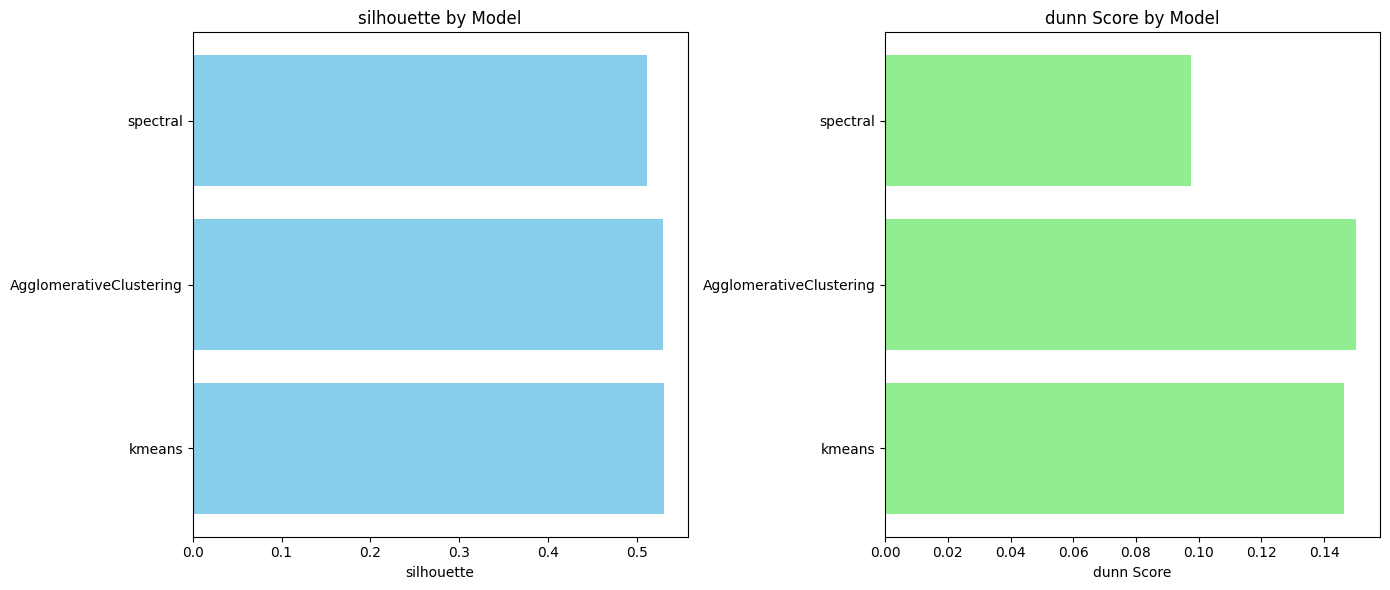

In [88]:
dict_list = [spectral_clustering.inf_list[1], agg_clustering.inf_list[0], kmeans_clustering.inf_list[1]]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(dict_list)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].barh(df['model'], df['silhouette_avg'], color='skyblue')
axes[0].set_xlabel('silhouette')
axes[0].set_title('silhouette by Model')
axes[0].invert_yaxis()  


axes[1].barh(df['model'], df['dunn_avg'], color='lightgreen')
axes[1].set_xlabel('dunn Score')
axes[1].set_title('dunn Score by Model')
axes[1].invert_yaxis()  

plt.tight_layout()
plt.show()

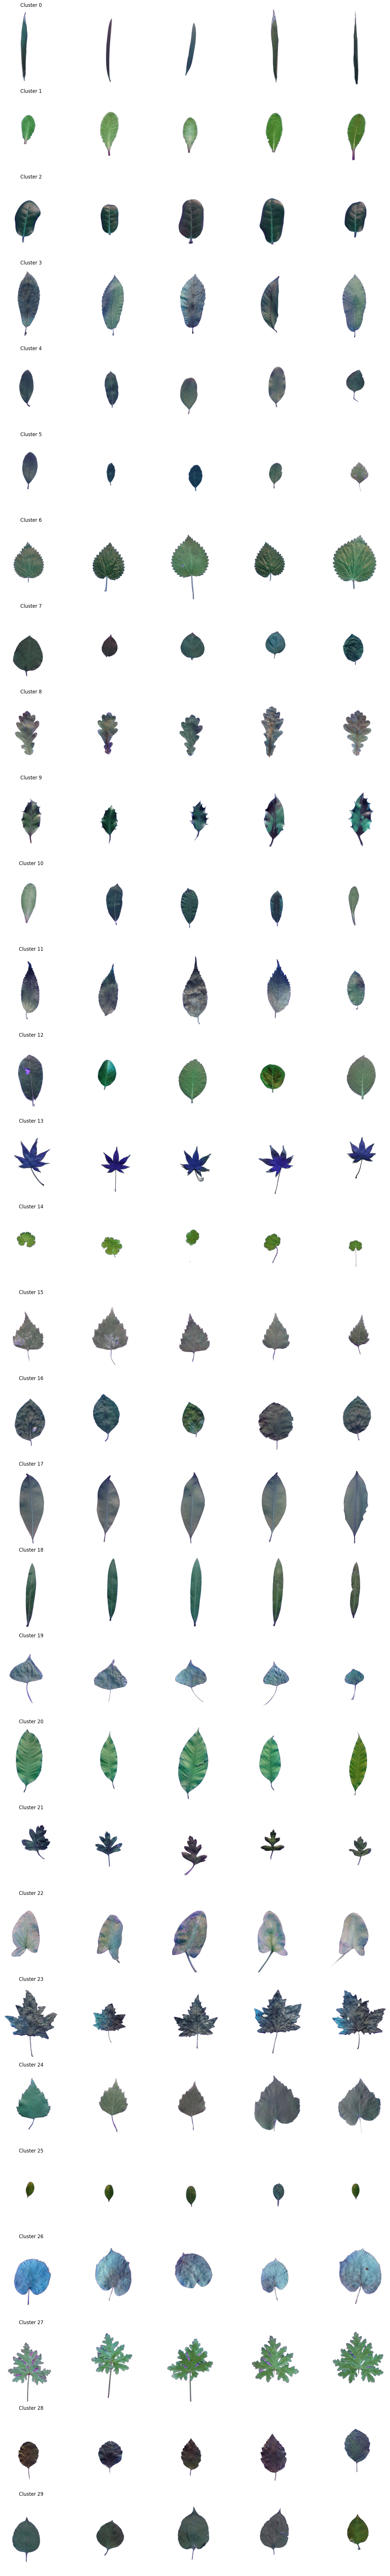

In [93]:
agg_clustering.fit_predict(agg_clustering.inf_list[0]['k'] ,X_tsne)
plot_five_ex_clusters(agg_clustering.clusters , images.rgb_images)

In [100]:
cluster_df = pd.DataFrame(agg_clustering.clusters)
cluster_df.value_counts()#.hist(bins=200)

0     22
1     19
4     18
25    17
13    16
11    14
5     14
16    13
3     13
8     12
24    12
6     12
12    11
14    11
18    11
2     10
27    10
23    10
19    10
22     9
9      9
10     9
17     9
21     8
20     8
26     8
29     7
7      6
28     6
15     6
Name: count, dtype: int64

In [102]:
l = np.array(cluster_df[0][cluster_df[0] == 0].index)
l

array([275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 308, 309,
       310, 311, 312, 313, 314, 315, 316, 317, 318], dtype=int64)

In [ ]:
for image in range(len(images.rgb_images)):
    if image in l:
        # print('ja')
        plt.imshow(images.rgb_images[image])
        plt.show()

In [ ]:
plot_five_ex_clusters(clusters , images.rgb_images)

c:\Users\akgh1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


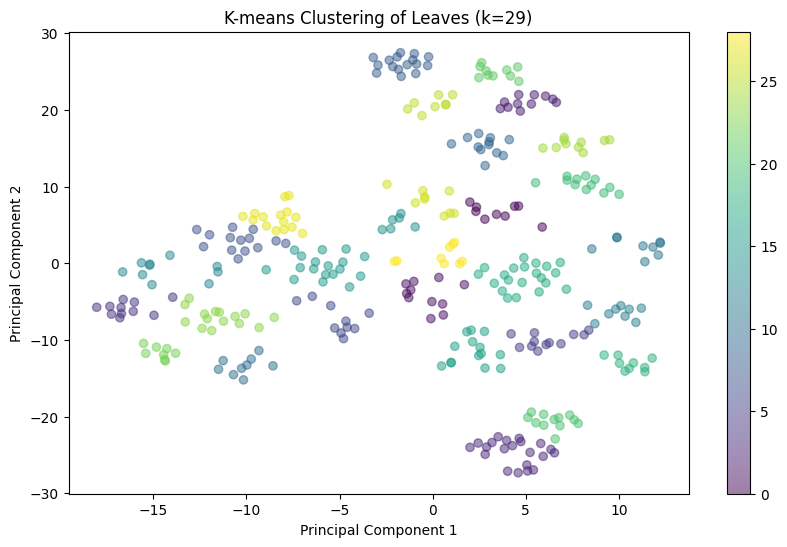

In [13]:
# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=29, random_state=42 )
clusters = kmeans.fit_predict(X_tsne)

# Add the cluster assignments to the original data
# df['Cluster'] = clusters

# Visualize the clusters using a pair plot (considering the first two principal components)
from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne.iloc[:, 0], X_tsne.iloc[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Leaves (k=29)')
plt.show()


In [210]:
clusters

array([-1,  0,  1,  0,  1,  1, -1,  0,  1, 30,  1,  1, -1,  2,  2,  2, -1,
        2, -1,  2, -1, -1,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3, -1, -1,
        4,  4,  4,  4,  4, 17,  5,  5,  5, -1,  5,  5,  5,  5,  5,  5,  5,
        5,  7,  6,  7, -1,  6,  6, -1,  7, -1, -1, -1,  8,  8,  8,  8, -1,
        8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, -1, 10, 10, -1,
       11, 10, 11,  1, 10, 11, -1, 10, 10, 11, 10, 10, -1, 10, -1, 12, 12,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 14, -1, 14, -1, 15, 15, 16, 15, 14, 15, 15, 15,
       17, 17, 17, -1, 17, 17, 18, -1, 17, -1, -1, 17, 17, 19, 19, 19, 19,
       16, 19, 16, -1, 19, 19, 19, -1, 20, 20, 20, 20, 20, 20, 20, 20, -1,
       -1, 21, 21, -1, 21, 21, 21, 21, -1, 21, 21, -1, -1, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, -1, -1, 18, 23, 23, -1, -1, -1, -1, 23,
       18, -1, -1, -1, 24, 24, 24, 24, 24, 24, 24, 24, -1, 21, 21, -1, 21,
       21, -1,  1, 21, 21

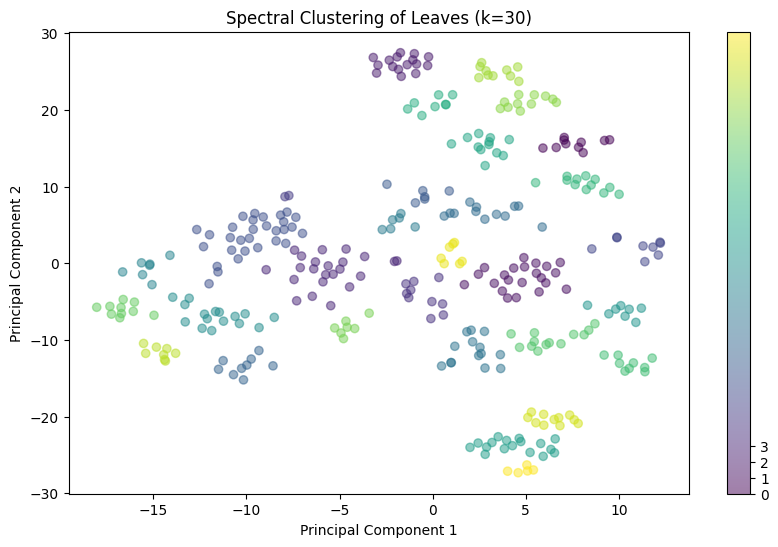

In [39]:
from sklearn.cluster import SpectralClustering
import itertools
# Perform Spectral Clustering with 4 clusters
spectral = SpectralClustering(n_clusters=30,random_state=42 )
clusters = spectral.fit_predict(X_tsne)

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_pca)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne.iloc[:, 0], X_tsne.iloc[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, ticks=[0, 1, 2, 3])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Spectral Clustering of Leaves (k=30)')
plt.show()

In [70]:
clusters

array([ 4, 42, 42, 42, 42,  2,  8, 42, 42,  2,  2, 42,  7, 24, 24, 24,  8,
       24,  8, 24,  7, 24, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,  1,  6,
        6,  6,  6,  6,  6,  1, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 18, 18, 18, 18, 18, 18, 18, 18,  3,  3,  3, 28, 28, 28, 28,  8,
       28, 28, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 16, 41, 41, 26,
       26, 41, 26, 42, 41, 26, 26, 41, 41, 26, 16, 16, 16, 16, 16, 36, 36,
       36, 36, 36, 36, 36, 36, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 31, 11, 31, 11, 11, 11, 35, 11, 31, 11, 11, 11,
        1,  1,  1,  5,  1,  1, 17,  1,  1,  1,  1,  1,  1, 37, 37, 37, 37,
       35, 37, 35, 23, 37, 37, 37, 37,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 13, 23,  7, 23, 13, 13, 23, 23, 23, 23,  7,  8, 34, 34, 34, 34,
       34, 34, 34, 34, 34, 34, 34, 25,  8, 17, 25, 25, 25, 25, 42, 25, 25,
       17,  5,  5, 15, 15, 15, 15, 15, 15, 15, 15, 15, 23, 23, 23, 33, 23,
       23,  4,  2, 23, 23

In [59]:
print(f"with len {len(df[df['Cluster'] == 0])}")
df[df['Cluster'] == 0].describe().T.drop(columns=['75%' , '25%' , "50%" , "std" , 'count']).T

with len 145


A          B         C         D         E         F         G  \
mean  18.02069   6.137931  0.725589  1.780526  0.437938  0.955262  0.993274   
min    1.00000   1.000000  0.117080  1.006600  0.136260  0.858100  0.956140   
max   35.00000  13.000000  0.946000  3.347500  0.708100  0.992560  1.000000   

            H         I         J  ...  cluster_on_distances  \
mean  0.64554  0.020656  0.119431  ...               0.22069   
min   0.40448  0.003658  0.002436  ...               0.00000   
max   0.84494  0.060707  0.670720  ...               1.00000   

      2_cluster_hog_plot  PC_dectances_from_centroid_1  \
mean            0.255172                      2.194681   
min             0.000000                     -7.126612   
max             1.000000                     10.452002   

      PC_dectances_from_centroid_2  PC_plot_hog_1  PC_pictures_hog_1  \
mean                     -1.898755      -0.809661           4.240984   
min                      -5.753886      -4.821616          -7.546606   
max                       4.118272       4.497504          16.981727   

      PC_pictures_hog_2  PC_cnn_features_1  PC_cnn_features_2  Cluster  
mean          -0.618719          17.798845          -2.592928      0.0  
min           -9.941613          -5.331740         -28.258076      0.0  
max           11.957644          40.734787          23.004870      0.0  

[3 rows x 36 columns]

In [60]:
print(f"with len {len(df[df['Cluster'] == 1])}")
df[df['Cluster'] == 1].describe().T.drop(columns=['75%' , '25%' , "50%" , "std" , 'count']).T

with len 141


A          B         C          D        E         F         G  \
mean  18.886525   6.283688  0.697782   3.371735  0.62561  0.825111  0.872987   
min    2.000000   1.000000  0.149860   1.011800  0.14538  0.485490  0.396490   
max   36.000000  16.000000  0.998710  19.038000  0.94834  0.987040  1.000000   

             H         I         J  ...  cluster_on_distances  \
mean  0.342263  0.063403  1.114971  ...              0.503546   
min   0.078376  0.004208  0.003223  ...              0.000000   
max   0.840700  0.198980  7.206200  ...              1.000000   

      2_cluster_hog_plot  PC_dectances_from_centroid_1  \
mean            0.737589                      0.306270   
min             0.000000                     -8.144301   
max             1.000000                     14.325292   

      PC_dectances_from_centroid_2  PC_plot_hog_1  PC_pictures_hog_1  \
mean                      1.146417       1.613003          -1.655872   
min                      -5.308444      -4.582282         -10.646636   
max                      10.458722       6.976740          15.483057   

      PC_pictures_hog_2  PC_cnn_features_1  PC_cnn_features_2  Cluster  
mean           0.316209         -17.612637          -5.825604      1.0  
min           -7.766471         -35.963880         -29.395733      1.0  
max           10.755990           4.429129          12.937212      1.0  

[3 rows x 36 columns]

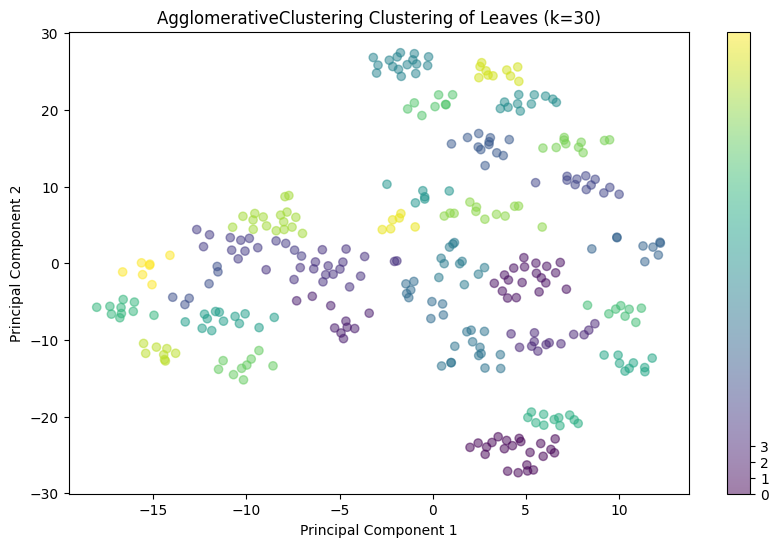

In [42]:
from sklearn.cluster import AgglomerativeClustering

# Choose the number of clusters (this can be determined by various methods)
n_clusters = 30

# Create the agglomerative clustering model
model = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model to the data
model.fit(X_tsne)
clusters = model.labels_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne.iloc[:, 0], X_tsne.iloc[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, ticks=[0, 1, 2, 3])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('AgglomerativeClustering Clustering of Leaves (k=30)')
plt.show()